# Практична робота №6

## Створіть власний набір даних для регресії

In [91]:
import tensorflow as tf

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


In [92]:
# Генеруємо набір даних для регресії
X, y = make_regression(n_samples=2000,    # Кількість екземплярів
                       n_features=5,      # Кількість параметрів
                       n_informative=4,   # Визначає кількість інформативних параметрів в наборі даних
                       noise=40,         # Рівень шуму
                       random_state=42)

data = pd.DataFrame(data=X, columns=[f'Feature_{i+1}' for i in range(5)])
data['Target'] = y

# Зберігаємо набір даних у CSV-файл
data.to_csv('data_for_pr6.csv', index=False)

In [93]:
# Завантаження даних
data = pd.read_csv('data_for_pr6.csv')

# Перегляд перших декількох рядків даних
print("---Перегляд перших декількох рядків даних---")
print(data.head(), "\n")

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---")
print(data.info(), "\n")

# Вивести основні статистичні показники даних
print("---Основні статистичні показники даних---")
print(data.describe(), "\n")

---Перегляд перших декількох рядків даних---
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0  -0.470042  -0.452090   0.882333   0.604515  -1.250408 -12.398976
1   0.318808   1.390834  -0.319907  -1.227829   0.058609   8.188175
2   0.180295  -0.189014  -0.728959  -0.044273   0.186990  21.932769
3  -1.326472   0.390696   0.340589   0.551476   0.271495  23.398945
4   0.198394   0.210303   1.084198  -1.198392   0.223281  -7.322685 

---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  2000 non-null   float64
 1   Feature_2  2000 non-null   float64
 2   Feature_3  2000 non-null   float64
 3   Feature_4  2000 non-null   float64
 4   Feature_5  2000 non-null   float64
 5   Target     2000 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB
None 

---

Reletive Plot Of Features


<Figure size 640x480 with 0 Axes>

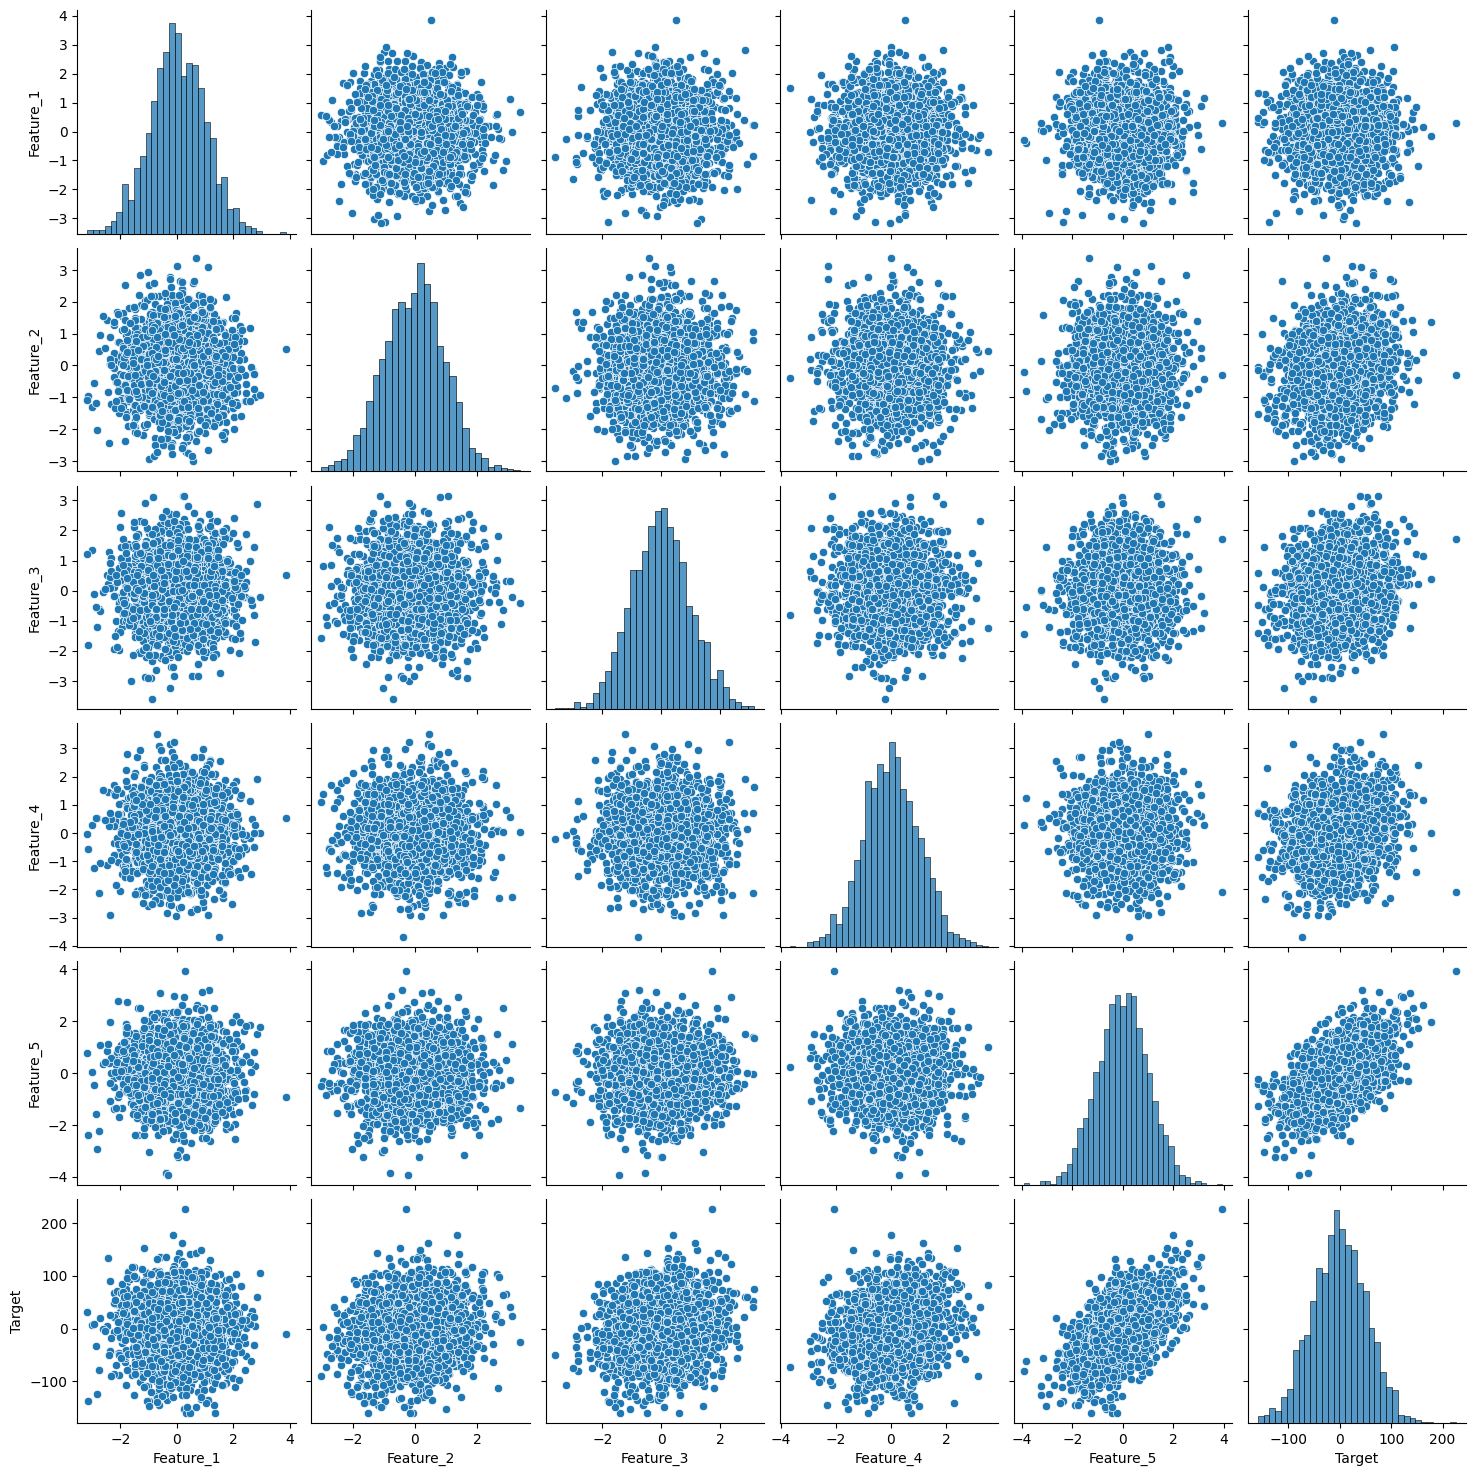

In [94]:
#To plot some selected features 

#Plotting following features
To_Plot = [ "Feature_1", "Feature_2", "Feature_3", "Feature_4", "Feature_5", "Target"]
print("Reletive Plot Of Features")
plt.figure()
sns.pairplot(data[To_Plot])

plt.show()

<Axes: >

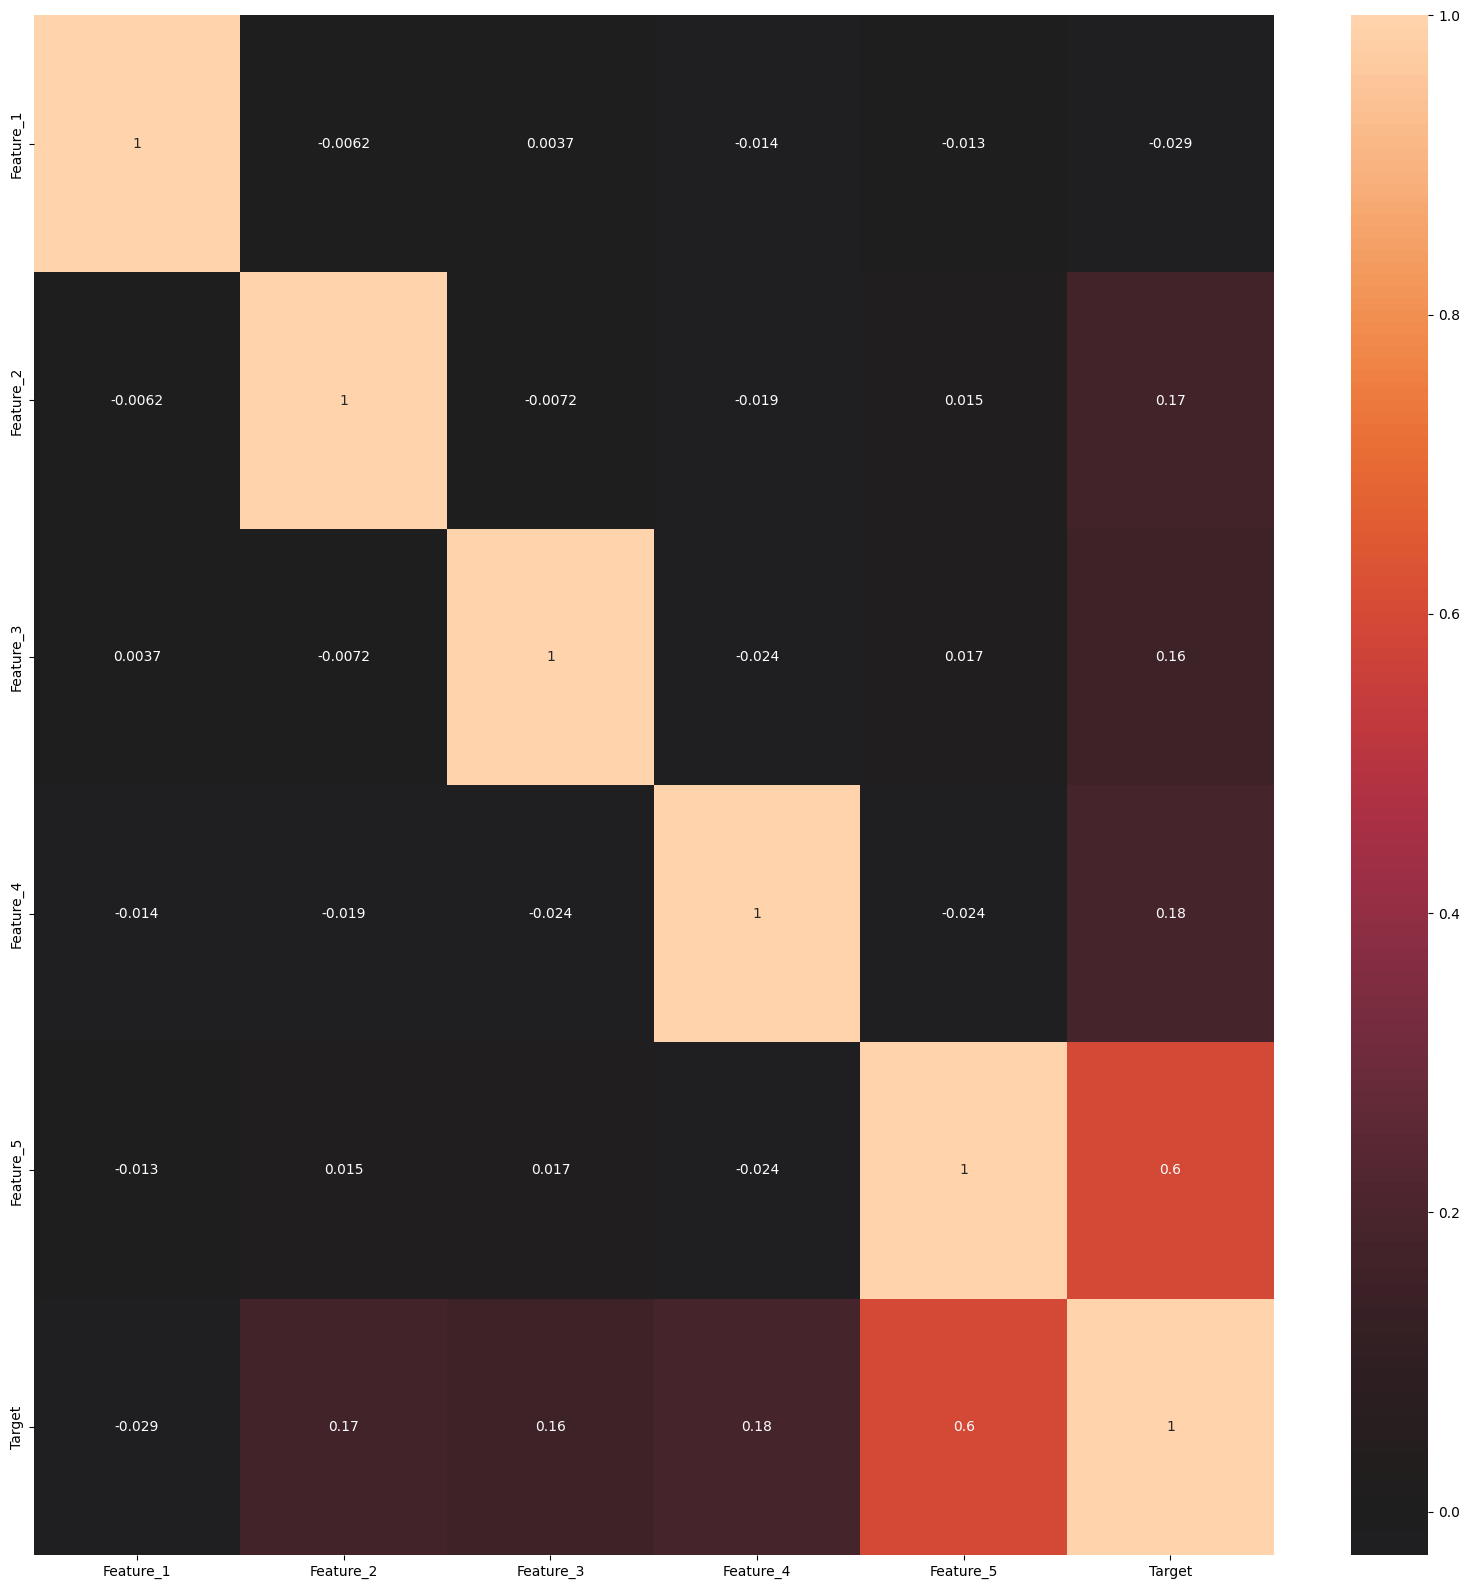

In [95]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

## 2. Побудова нейронної мережі 
Спробуйте побудувати нейронну мережу з трьома повнозв'язними шарами (Dense layers) та навчити її на вашому власному наборі даних для регресії (200 епох). Оцініть її ефективність.

In [309]:
# Стандартизуємо дані
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Розділяємо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

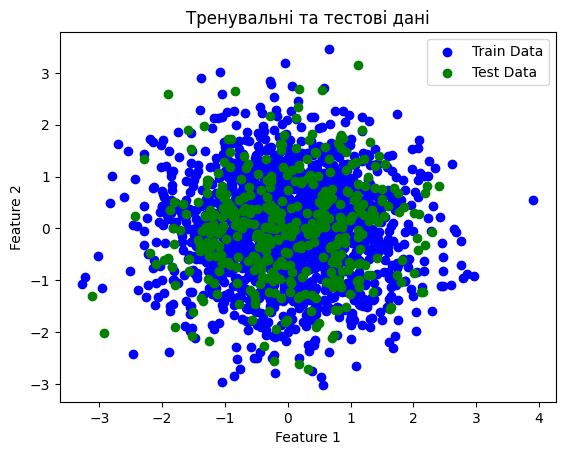

In [310]:
def plot_train_test_data(X_train, X_test, y_train, y_test):
    # Позначимо дані для тренування червоним кольором, а для тестування синім
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label='Train Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], color='green', label='Test Data')

    plt.title('Тренувальні та тестові дані')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Викликаємо функцію для побудови графіку
plot_train_test_data(X_train, X_test, y_train, y_test)

In [311]:
# Set random seed
tf.random.set_seed(42)

# Створимо послідовну модель
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Один вихідний нейрон для регресії
])

# Компілюємо модель
# model.compile(loss=tf.keras.losses.mae, optimizer='adam', metrics=['mae'])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Виведемо інформацію про модель
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_173 (Dense)           (None, 64)                384       
                                                                 
 dense_174 (Dense)           (None, 32)                2080      
                                                                 
 dense_175 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [312]:
# Навчимо модель
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200


50/50 [==============================] - 2s 13ms/step - loss: 36.6387 - mae: 36.6387 - val_loss: 33.1437 - val_mae: 33.1437
Epoch 2/200
50/50 [==============================] - 0s 6ms/step - loss: 31.8406 - mae: 31.8406 - val_loss: 32.8711 - val_mae: 32.8711
Epoch 3/200
50/50 [==============================] - 0s 5ms/step - loss: 31.6384 - mae: 31.6384 - val_loss: 32.7276 - val_mae: 32.7276
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 31.4253 - mae: 31.4253 - val_loss: 32.3618 - val_mae: 32.3618
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 31.5630 - mae: 31.5630 - val_loss: 32.7606 - val_mae: 32.7606
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 31.3528 - mae: 31.3528 - val_loss: 32.4303 - val_mae: 32.4303
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 31.2074 - mae: 31.2074 - val_loss: 32.5070 - val_mae: 32.5070
Epoch 8/200
50/50 [==============================] - 0s 3ms/step -

Training Loss: 23.911619186401367, Training MSE: 23.911619186401367
Test Loss: 36.007041931152344, Test MSE: 36.007041931152344


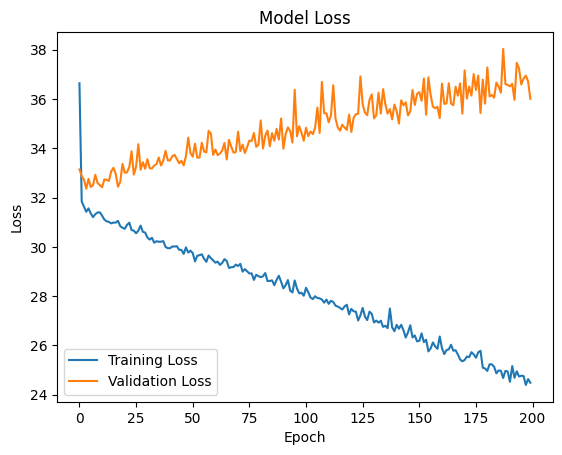

In [313]:
# Оцінимо результати навчання
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss[0]}, Training MSE: {train_loss[1]}')
print(f'Test Loss: {test_loss[0]}, Test MSE: {test_loss[1]}')

# Візуалізуємо результати навчання
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step


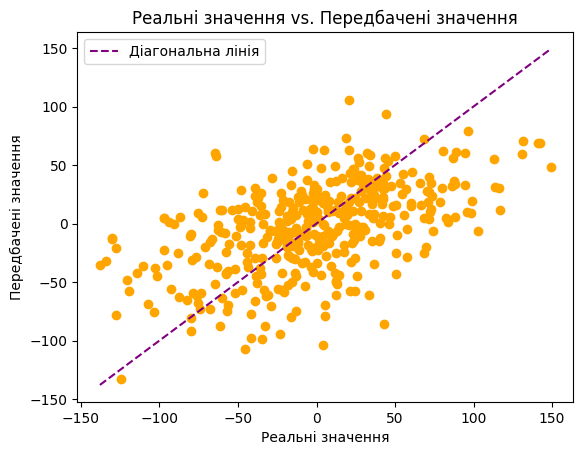

In [314]:
# Передбачення за допомогою натренованої моделі
y_pred_1 = model.predict(X_test)

# Побудова графіку з діагональною лінією
plt.scatter(y_test, y_pred_1, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='purple', label='Діагональна лінія')
plt.title('Реальні значення vs. Передбачені значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')
plt.legend()
plt.show()

In [315]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)
  
def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

# Calculate model_1 metrics
mae_1 = mae(y_test, y_pred_1.squeeze()).numpy()
mse_1 = mse(y_test, y_pred_1.squeeze()).numpy()
print("---For Model1---")
print("MAE: ", mae_1)
print("MSE: ", mse_1)

---For Model1---
MAE:  36.00704
MSE:  2084.7124


## 3. Спробуйте покращити результати, використовуючи такі підходи
Побудова більшої моделі (як поводиться модель з чотирма повнозв'язними шарами?).
Збільшення кількості нейронів у кожному шарі.
Ознайомтеся з документацією Adam та з'ясуйте, що являє собою перший параметр. Які зміни відбудуться, якщо збільшити його в 10 разів?
Які будуть результати, якщо тренування проводити довше (наприклад, 300 епох замість 200)?

In [316]:
# Set random seed
tf.random.set_seed(42)

# Створимо послідовну модель
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')  # Один вихідний нейрон для регресії
])

# Компілюємо модель
# model.compile(loss=tf.keras.losses.mae, optimizer='adam', metrics=['mae'])

# Compile model (same as above)
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(
                    learning_rate=0.0001),
              metrics=["mae"])

# Виведемо інформацію про модель
model2.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 128)               768       
                                                                 
 dense_177 (Dense)           (None, 64)                8256      
                                                                 
 dense_178 (Dense)           (None, 32)                2080      
                                                                 
 dense_179 (Dense)           (None, 16)                528       
                                                                 
 dense_180 (Dense)           (None, 1)                 17        
                                                                 
Total params: 11649 (45.50 KB)
Trainable params: 11649 (45.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [317]:
# Навчимо модель
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
50/50 [==============================] - 2s 8ms/step - loss: 42.7040 - mae: 42.7040 - val_loss: 41.0559 - val_mae: 41.0559
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 42.6723 - mae: 42.6723 - val_loss: 41.0200 - val_mae: 41.0200
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 42.6263 - mae: 42.6263 - val_loss: 40.9710 - val_mae: 40.9710
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 42.5621 - mae: 42.5621 - val_loss: 40.8961 - val_mae: 40.8961
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 42.4619 - mae: 42.4619 - val_loss: 40.7852 - val_mae: 40.7852
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 42.3064 - mae: 42.3064 - val_loss: 40.6048 - val_mae: 40.6048
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 42.0513 - mae: 42.0513 - val_loss: 40.3236 - val_mae: 40.3236
Epoch 8/100
50/50 [==============================] - 0s

Training Loss: 30.9495906829834, Training MSE: 30.9495906829834
Test Loss: 32.28874969482422, Test MSE: 32.28874969482422


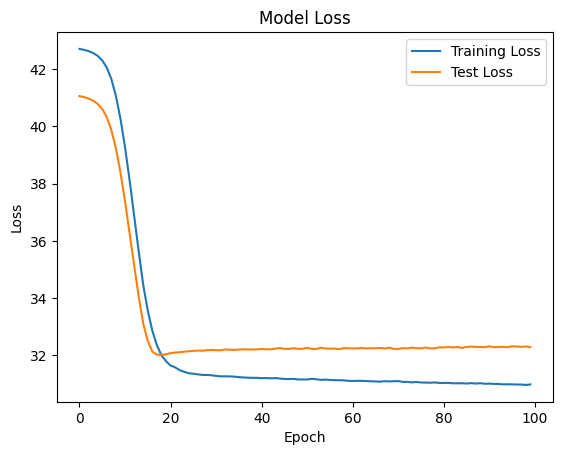

In [318]:
# Оцінимо результати навчання
train_loss2 = model2.evaluate(X_train, y_train, verbose=0)
test_loss2 = model2.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss2[0]}, Training MSE: {train_loss2[1]}')
print(f'Test Loss: {test_loss2[0]}, Test MSE: {test_loss2[1]}')

# Візуалізуємо результати навчання
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step


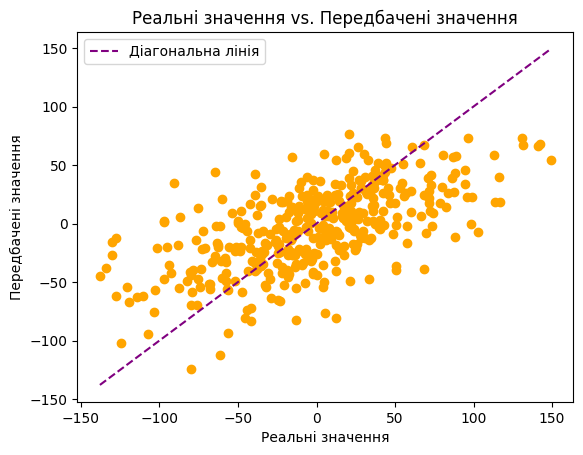

In [319]:
# Передбачення за допомогою натренованої моделі
y_pred2 = model2.predict(X_test)

# Побудова графіку з діагональною лінією
plt.scatter(y_test, y_pred2, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='purple', label='Діагональна лінія')
plt.title('Реальні значення vs. Передбачені значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')
plt.legend()
plt.show()

In [320]:
# Calculate model_1 metrics
mae_2 = mae(y_test, y_pred2.squeeze()).numpy()
mse_2 = mse(y_test, y_pred2.squeeze()).numpy()
print("---For Model1---")
print("MAE: ", mae_2)
print("MSE: ", mse_2)

---For Model1---
MAE:  32.288754
MSE:  1698.7144


Коли я додала четвертий шар, це не змінило точність передбачених показників. Збільшення к-сті нейронів теж суттєво не вплинуло на модель. Зміна оптимайзера на Adam не сильно вплинула. При збільшенні к-сті епох з 200 до 300 покрашилися показники Training Loss: 23, Training MSE: 23.7. Але Test Loss i Test MSE - погіршилися на одиницю.

Параметр learning_rate в оптимізаторі Adam визначає розмір кроку, за яким ваги моделі оновлюються під час навчання. 

При значенні learning_rate=0.01  (в 10 разів більше за стандартне). показники передбачених даних MAE та MSE стали гірші: 
MAE:  37.7
MSE:  2283.2

При learning_rate=0.0001 MAE та MSE покращилися. MAE:  32.343666
MSE:  1710.726

При зміні к-сті епох значення трохи покращилися

In [322]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,36.007038,2084.712402
1,model_2,32.288754,1698.714355


Бачимо порівняння результатів передбачення двох моделей. Друга, яку ми намагалися покращити, має кращі показники